# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##Observations
- Based on the observable trends below, we can see how the temperature changes depending on the latitude. As the latitude gets closer to zero the temperature rises. This is confirmed by the high correlation coefficient.
- While temperature has a strong correlation, humidity, cloudiness, and wind speed do not. This is evidenced by thier very low corrlation coefficients. 
- Lastly, I found it interesting that most cities have high humidity. I thought there would be a greater variation here, similar to that of cloudiness. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=d5437e1e573bf2f48e94c4dfe481d5ea&units=imperial&q='

In [4]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_date = []
city_name = []
record_count = 0

#Loop through cities to build full URL for each city
for city in cities:
    record_count = record_count + 1
    print(f"Processing record {record_count} | {city}")
    #print(query_url+city)
    #pprint(response)
    try:
        response = requests.get(query_url + city).json() 
        time.sleep(1)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])
        city_name.append(response['name'])
       
    except:
        print("city not found")
        pass
    
    

Processing record 1 | east london
Processing record 2 | saleaula
city not found
Processing record 3 | dikson
Processing record 4 | punta arenas
Processing record 5 | hirado
Processing record 6 | katha
city not found
Processing record 7 | carnarvon
Processing record 8 | matto
city not found
Processing record 9 | provideniya
Processing record 10 | bredasdorp
Processing record 11 | saint george
Processing record 12 | kapaa
Processing record 13 | cumaribo
city not found
Processing record 14 | hermanus
Processing record 15 | antofagasta
Processing record 16 | saint-philippe
Processing record 17 | korla
Processing record 18 | taolanaro
city not found
Processing record 19 | busselton
Processing record 20 | mar del plata
Processing record 21 | chinsali
Processing record 22 | kavieng
Processing record 23 | polunochnoye
Processing record 24 | klaksvik
Processing record 25 | medea
Processing record 26 | jamestown
Processing record 27 | nhulunbuy
Processing record 28 | pevek
Processing record 29 |

Processing record 239 | north platte
Processing record 240 | artyk
city not found
Processing record 241 | zambezi
Processing record 242 | longlac
city not found
Processing record 243 | college
Processing record 244 | mys shmidta
city not found
Processing record 245 | kamaishi
Processing record 246 | peniche
Processing record 247 | estelle
Processing record 248 | gorontalo
Processing record 249 | bluff
Processing record 250 | mundra
Processing record 251 | lolua
city not found
Processing record 252 | abu dhabi
Processing record 253 | alotau
city not found
Processing record 254 | kastamonu
Processing record 255 | constitucion
Processing record 256 | nouadhibou
Processing record 257 | lagoa
Processing record 258 | zolotinka
city not found
Processing record 259 | hovd
Processing record 260 | aklavik
Processing record 261 | grand river south east
city not found
Processing record 262 | panji
Processing record 263 | aitape
Processing record 264 | mogochin
city not found
Processing record 265 

Processing record 476 | zyryanka
Processing record 477 | lasem
Processing record 478 | umm durman
city not found
Processing record 479 | steenbergen
Processing record 480 | los llanos de aridane
Processing record 481 | high rock
Processing record 482 | mana
Processing record 483 | red wing
Processing record 484 | santa lucia
Processing record 485 | inuvik
Processing record 486 | drjanovo
city not found
Processing record 487 | laguna de perlas
Processing record 488 | angoche
Processing record 489 | ola
Processing record 490 | buchanan
Processing record 491 | jalu
Processing record 492 | qinzhou
Processing record 493 | chabahar
Processing record 494 | tsihombe
city not found
Processing record 495 | kangaatsiaq
Processing record 496 | shawville
Processing record 497 | kupang
Processing record 498 | guanare
Processing record 499 | bonthe
Processing record 500 | grand gaube
Processing record 501 | rognan
Processing record 502 | boaco
Processing record 503 | umzimvubu
city not found
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dic = {"City": city_name, 
               "Latitude": lat,
               "Longitude":lon,
              "Temperature": temp,
              "Humidity": humidity,
              "Cloudiness": cloudiness, 
              "Wind Speed": wind_speed, 
              "Country": country, 
              "City Date": city_date}

weather_data = pd.DataFrame(weather_dic)
weather_data.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,City Date
0,East London,-33.0153,27.9116,61.92,81,16,4.50,ZA,1635649071
1,Dikson,73.5069,80.5464,6.19,90,94,15.08,RU,1635649074
2,Punta Arenas,-53.1500,-70.9167,42.91,70,0,4.61,CL,1635649075
3,Hirado,33.3597,129.5531,69.15,65,6,18.97,JP,1635649077
4,Carnarvon,-24.8667,113.6333,73.47,56,0,18.41,AU,1635648791
5,Provideniya,64.3833,-173.3000,12.74,73,88,11.56,RU,1635649081
6,Bredasdorp,-34.5322,20.0403,52.92,94,39,3.44,ZA,1635649083
7,Saint George,37.1041,-113.5841,65.66,47,100,1.99,US,1635649084
8,Kapaa,22.0752,-159.3190,73.90,76,90,5.75,US,1635649086
9,Hermanus,-34.4187,19.2345,59.81,88,78,8.32,ZA,1635649088


In [6]:

#save as CSV
weather_data.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data.loc[weather_data["Humidity"] >= 100]
high_humidity.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,City Date
155,Chernushka,56.5072,56.0766,37.24,100,100,4.59,RU,1635649297
267,Vila Velha,-20.3297,-40.2925,71.55,100,90,3.44,BR,1635649460
342,Hambantota,6.1241,81.1185,77.34,100,40,3.44,LK,1635649561
348,Östersund,63.1792,14.6357,41.45,100,40,11.50,SE,1635649570
398,Rovaniemi,66.5000,25.7167,38.61,100,90,2.30,FI,1635649642


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data = weather_data.drop(weather_data.index[weather_data['Humidity'] == 100], inplace=False)
clean_weather_data

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,City Date
0,East London,-33.0153,27.9116,61.92,81,16,4.50,ZA,1635649071
1,Dikson,73.5069,80.5464,6.19,90,94,15.08,RU,1635649074
2,Punta Arenas,-53.1500,-70.9167,42.91,70,0,4.61,CL,1635649075
3,Hirado,33.3597,129.5531,69.15,65,6,18.97,JP,1635649077
4,Carnarvon,-24.8667,113.6333,73.47,56,0,18.41,AU,1635648791
...,...,...,...,...,...,...,...,...,...
564,Luanda,-8.8368,13.2343,75.20,83,75,6.91,AO,1635649874
565,Kutum,14.2000,24.6667,71.65,26,83,7.49,SD,1635649875
566,Wajima,37.4000,136.9000,63.84,66,99,5.57,JP,1635649876
567,Twentynine Palms,34.1356,-116.0542,75.74,25,94,5.99,US,1635649878


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

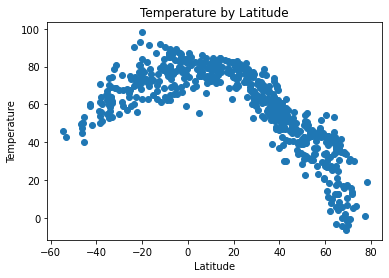

In [9]:
#Create Scatter plots
x_axis = lat
y_axis = temp
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature by Latitude")
plt.savefig("../output_data/fig1.png")
plt.show()

There is a very clear relationship between temperature and latitude. The closer to the equator, the higher the temperature. 

## Latitude vs. Humidity Plot

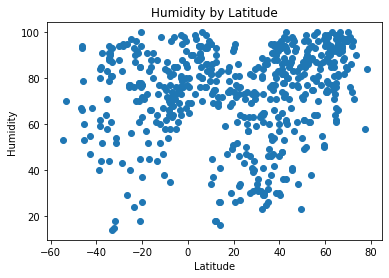

In [10]:
x_axis = lat
y_axis = humidity
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity by Latitude")
plt.savefig("../output_data/fig2.png")
plt.show()

There is a no clear relationship between humidity and latitude.  The data isn't trending in any directions.

## Latitude vs. Cloudiness Plot

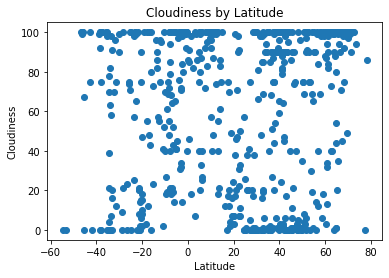

In [11]:
x_axis = lat
y_axis = cloudiness
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude")
plt.savefig("../output_data/fig3.png")
plt.show()

There is no clear relationship between cloudiness and latitide. The data is fairly evenly distributed both near to and far from the equator. 

## Latitude vs. Wind Speed Plot

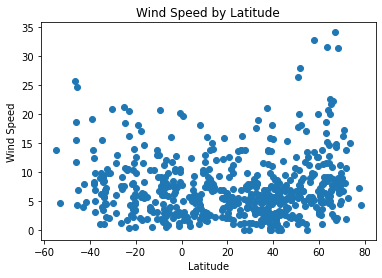

In [12]:
x_axis = lat
y_axis = wind_speed
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed by Latitude")
plt.savefig("../output_data/fig4.png")
plt.show()

Again, there is no clear relationship between wind speed and latitude as the data doesnst trend one way or another. 

## Linear Regression

In [13]:
#create new lists to store northern and southern hemishere data
nh_lat = weather_data.loc[weather_data['Latitude'] >=0, ['Latitude']]
sh_lat = weather_data.loc[weather_data['Latitude'] <0, ['Latitude']]
#will need to add these to df if needed
# nh_lon = weather_data.loc[weather_data['Latitude'] >=0, ['Longitude']]
# sh_lon = weather_data.loc[weather_data['Latitude'] <0, ['Longitude']]
nh_temp = weather_data.loc[weather_data['Latitude'] >=0, ['Temperature']]
sh_temp = weather_data.loc[weather_data['Latitude'] <0, ['Temperature']]
nh_humidity = weather_data.loc[weather_data['Latitude'] >=0, ['Humidity']]
sh_humidity = weather_data.loc[weather_data['Latitude'] <0, ['Humidity']]
nh_cloudiness = weather_data.loc[weather_data['Latitude'] >=0, ['Cloudiness']]
sh_cloudiness = weather_data.loc[weather_data['Latitude'] <0, ['Cloudiness']]
nh_wind_speed = weather_data.loc[weather_data['Latitude'] >=0, ['Wind Speed']]
sh_wind_speed = weather_data.loc[weather_data['Latitude'] <0, ['Wind Speed']]
nh_country = weather_data.loc[weather_data['Latitude'] >=0, ['Country']]
sh_country = weather_data.loc[weather_data['Latitude'] <0, ['Country']]
nh_city_date = weather_data.loc[weather_data['Latitude'] >=0, ['City Date']]
sh_city_date = weather_data.loc[weather_data['Latitude'] <0, ['City Date']]
nh_city_name = weather_data.loc[weather_data['Latitude'] >=0, ['City']]
sh_city_name = weather_data.loc[weather_data['Latitude'] <0, ['City']]
     


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

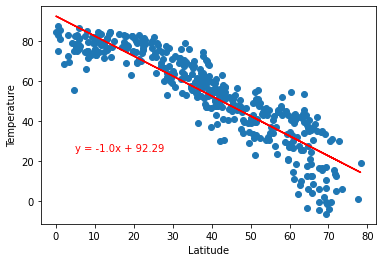

The correlation between both factors is -0.89


In [14]:
x_values = nh_lat['Latitude']
y_values = nh_temp['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/fig5.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_temp['Temperature'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

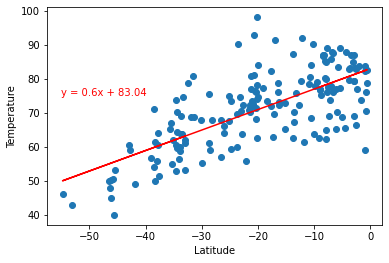

The correlation between both factors is 0.71


In [15]:
x_values = sh_lat['Latitude']
y_values = sh_temp['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/fig6.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_temp['Temperature'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

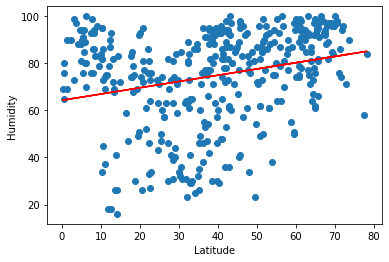

The correlation between both factors is 0.26


In [16]:
x_values = nh_lat['Latitude']
y_values = nh_humidity['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/fig7.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_humidity['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

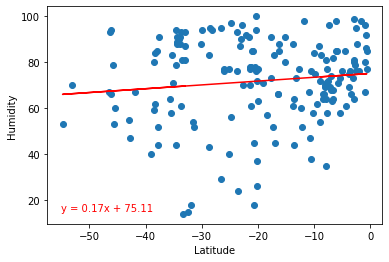

The correlation between both factors is 0.12


In [17]:
x_values = sh_lat['Latitude']
y_values = sh_humidity['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/fig8.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_humidity['Humidity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

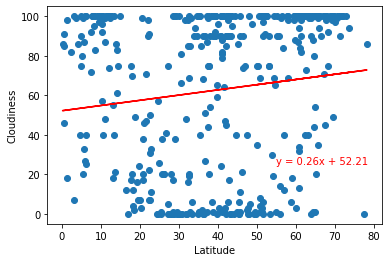

The correlation between both factors is 0.13


In [18]:
x_values = nh_lat['Latitude']
y_values = nh_cloudiness['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/fig9.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_cloudiness['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

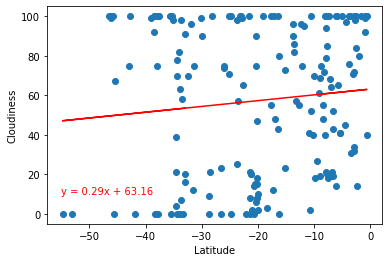

The correlation between both factors is 0.1


In [19]:
x_values = sh_lat['Latitude']
y_values = sh_cloudiness['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../output_data/fig10.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_cloudiness['Cloudiness'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

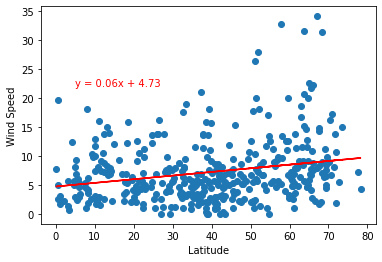

The correlation between both factors is 0.23


In [20]:
x_values = nh_lat['Latitude']
y_values = nh_wind_speed['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/fig11.png")
plt.show()

correlation = st.pearsonr(nh_lat['Latitude'],nh_wind_speed['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

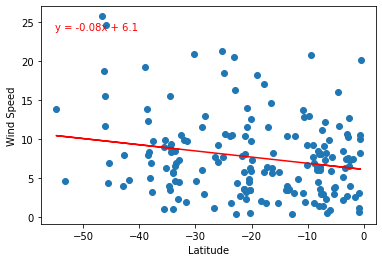

The correlation between both factors is -0.21


In [21]:
x_values = sh_lat['Latitude']
y_values = sh_wind_speed['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/fig12.png")
plt.show()

correlation = st.pearsonr(sh_lat['Latitude'],sh_wind_speed['Wind Speed'])
print(f"The correlation between both factors is {round(correlation[0],2)}")